<a href="https://colab.research.google.com/github/yasserius/facial-recognition-VGGFace/blob/main/facial_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning based Facial Recognition with VGGFace


<img src="https://miro.medium.com/max/2000/1*dhXsTa5zOVk79AowpMHKbg.png"/>
<small>
  <a href="https://miro.medium.com/max/2000/1*dhXsTa5zOVk79AowpMHKbg.png">(Source)</a>
</small>

Welcome! This notebook uses a pretrained facial embeddings model called [Keras VGGFace](https://github.com/rcmalli/keras-vggface). Images are uploaded to this notebook and compared for recognition/verification.

<small>Keywords: python facial recognition, facial verification, deep learning facial recognition, facial embeddings, facial comparison, VGGFace<small/>

The program works as follow:


1.  Detect face(s) in the input image and crop out the face(s) only.
2.  Input the cropped face(s) into the embeddings generator, get the output embedding vector.
3. Compare the distance between embeddings vectors to see how similar they are.



Source: [machine learning mastery](https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/)
This tutorial is amazing and most of the code is from there.

#Download the model and face detection libraries

VGGFace returns a facial embedding of dimensions 

In [1]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-94cbw98n
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-94cbw98n
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=ac5231a2e417de5e5d3b10f1ec9871e40bb26f78455c43233ef39b0d960616fc
  Stored in directory: /tmp/pip-ephem-wheel-cache-eteccngy/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


[MTCNN](https://github.com/ipazc/mtcnn) is a very accurate face detection program, with an easy to use face extractor functions.

In [2]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 2.8MB/s 


#Helper functions
Contains the face detection, face embeddings model and embeddings comparison functions needed.

In [3]:
!pip install keras_applications

     |████████████████████████████████| 51kB 1.6MB/s 


In [27]:
# source https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/

from matplotlib import pyplot
from PIL import Image
import numpy as np
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from IPython.display import clear_output, display
 


def extract_face(filename, required_size=(224, 224), display=True):
	pixels = pyplot.imread(filename)
	detector = MTCNN()
	results = detector.detect_faces(np.array(pixels)[:, :, 0:3])
	num_faces = len(results)
 
	if display:
		print("%d face(s) detected." % num_faces)
	
	faces_array = []
	for i in range(num_faces):
		x1, y1, width, height = results[i]['box']
		x2, y2 = x1 + width, y1 + height
		face = pixels[y1:y2, x1:x2]
		image = Image.fromarray(face)
		image = image.resize(required_size)
		if display:
			pyplot.subplot(1, num_faces, i+1)
			pyplot.imshow(image)
			pyplot.xticks([])
			pyplot.yticks([])
			pyplot.show()
		faces_array.append(asarray(image))
	
	return faces_array



def get_embeddings(face):
	face = asarray(face, 'float32')
	face = np.expand_dims(face, axis=0)
	face = preprocess_input(face, version=2)
	model = VGGFace(model='resnet50',
	                include_top=False,
									input_shape=(224, 224, 3),
									pooling='avg')
	embeddings = model.predict(face)
	embeddings = np.squeeze(embeddings, axis=0)
	
	return embeddings


def is_match(face1, face2, thresh=0.5, display_images=True):
	embed1 = get_embeddings(face1)
	embed2 = get_embeddings(face2)

	score = cosine(embed1, embed2)
 
	clear_output(wait=True)
	if score <= thresh:
		display('Match (%.3f <= %.3f)' % (score, thresh))
	else:
		display('NOT a match (%.3f > %.3f)' % (score, thresh))
	
	if display_images:
		pyplot.subplot(1, 2, 1)
		pyplot.imshow(face1)
		pyplot.xticks([])
		pyplot.yticks([])

		pyplot.subplot(1, 2, 2)
		pyplot.imshow(face2)
		pyplot.xticks([])
		pyplot.yticks([])

# Compare the face embeddings side-by-side

In [15]:
%%bash
wget https://static.toiimg.com/thumb/msid-69852389,imgsize-237333,width-400,resizemode-4/69852389.jpg
wget https://images.outlookindia.com/public/uploads/articles/2019/10/29/Shakib-Al-Hasan-File_570_850.jpg
wget https://images.mid-day.com/images/2018/jul/Tamim-Iqbal_d.jpg

--2020-11-08 10:00:46--  https://static.toiimg.com/thumb/msid-69852389,imgsize-237333,width-400,resizemode-4/69852389.jpg
Resolving static.toiimg.com (static.toiimg.com)... 172.224.167.24, 2600:1402:3800:1ab::216f, 2600:1402:3800:197::216f
Connecting to static.toiimg.com (static.toiimg.com)|172.224.167.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14579 (14K) [image/jpeg]
Saving to: ‘69852389.jpg.1’

     0K .......... ....                                       100% 34.8M=0s

2020-11-08 10:00:46 (34.8 MB/s) - ‘69852389.jpg.1’ saved [14579/14579]

--2020-11-08 10:00:46--  https://images.outlookindia.com/public/uploads/articles/2019/10/29/Shakib-Al-Hasan-File_570_850.jpg
Resolving images.outlookindia.com (images.outlookindia.com)... 23.209.36.187, 23.209.36.219, 2600:1402:f000::17df:c809, ...
Connecting to images.outlookindia.com (images.outlookindia.com)|23.209.36.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70496 (69K) [im

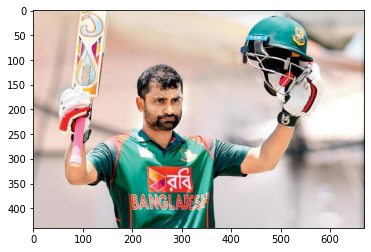

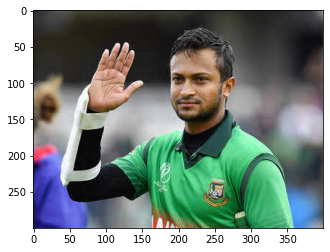

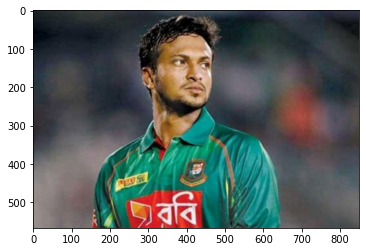

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

for filepath in ["/content/Tamim-Iqbal_d.jpg", "/content/69852389.jpg", "/content/Shakib-Al-Hasan-File_570_850.jpg"]:
  plt.imshow(Image.open(filepath))
  plt.show()

1 face(s) detected.


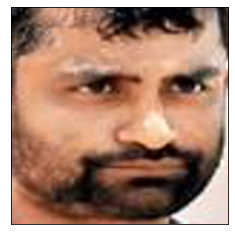

1 face(s) detected.


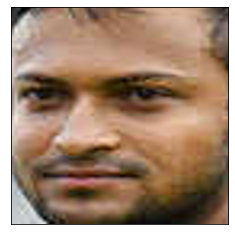

1 face(s) detected.


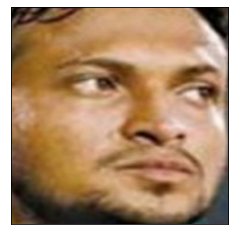

In [25]:
# sorry for the ugly filenames :(
face1 = extract_face("/content/Tamim-Iqbal_d.jpg")
face2 = extract_face("/content/69852389.jpg")
face3 = extract_face("/content/Shakib-Al-Hasan-File_570_850.jpg")

'NOT a match (0.595 > 0.500)'

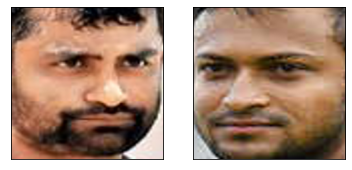

In [28]:
is_match(face1[0], face2[0])

'NOT a match (0.716 > 0.500)'

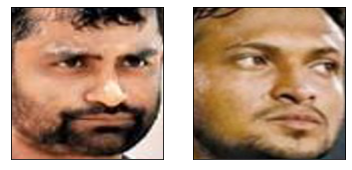

In [29]:
is_match(face1[0], face3[0])

'Match (0.223 <= 0.500)'

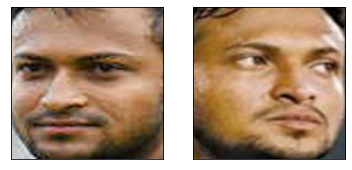

In [30]:
is_match(face2[0], face3[0])